## Importations les bibliothèques 

In [1]:
!!pip install charset_normalizer

['Requirement already satisfied: charset_normalizer in c:\\users\\j_aka\\anaconda3\\envs\\statistique\\lib\\site-packages (3.3.2)']

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt


c:\Users\j_aka\anaconda3\envs\statistique\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


## définitions des chemins 

In [3]:
train_ch = r"C:\Users\j_aka\Desktop\DL Project\seg_train\seg_train"
#val_ch = r"C:\Users\j_aka\Desktop\DL Project\seg_pred\seg_pred" 
test_ch =r"C:\Users\j_aka\Desktop\DL Project\seg_test\seg_test"

### Définition de paramètres

In [4]:
img_size = (150,150)
batch_size = 32

## Charger les données

### Train et Val

In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_ch,
    validation_split=0.2,
    subset="training",
    image_size=img_size,
    batch_size=batch_size,
    seed=125,
    #shuffle=True
    )
train_ds=train_ds.cache().shuffle(2000).prefetch(buffer_size=tf.data.AUTOTUNE)

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_ch,
    validation_split=0.2,
    subset="validation",
    image_size=img_size,
    batch_size=batch_size,
    seed=125,
    #shuffle=False
    )
val_ds=val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


Found 14034 files belonging to 6 classes.
Using 11228 files for training.
Found 14034 files belonging to 6 classes.
Using 2806 files for validation.


### Test

In [10]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_ch,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False 
)
test_ds  = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 3000 files belonging to 6 classes.


## Normalisation 

In [17]:
normalisation_layer = tf.keras.layers.Rescaling(1./255)
train_ds=train_ds.map(lambda x,y:(normalisation_layer(x),y))
val_ds=val_ds.map(lambda x,y:(normalisation_layer(x),y))
test_ds=test_ds.map(lambda x,y:(normalisation_layer(x),y))

## Augmentation de la donnée 

In [20]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),        
    tf.keras.layers.RandomRotation(0.1),            
    tf.keras.layers.RandomZoom(0.1),                
    tf.keras.layers.RandomContrast(0.2),             
])


### Visualisation 

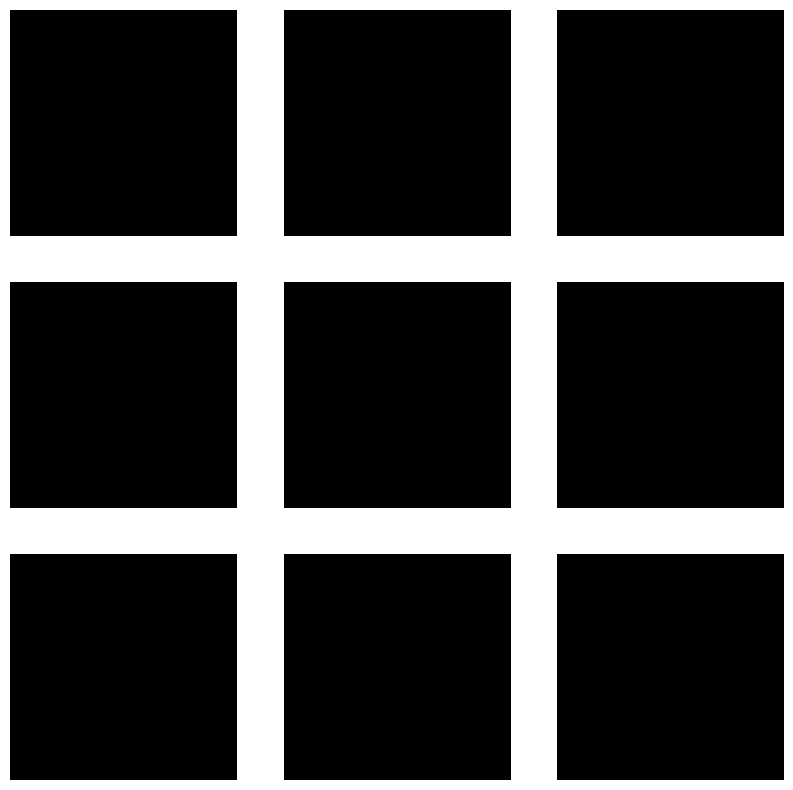

In [21]:
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        augmented_image = data_augmentation(images)[i].numpy()
        plt.subplot(3, 3, i+1)
        plt.imshow(augmented_image)
        plt.axis("off")
    plt.show()